In [49]:
#Descargamos la libreria de Yahoo Finance
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
#Importamos librerias necesarias
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Descarga de datos del indice S&P 500**

In [51]:
#Descarga los datos del índice S&P 500 de yfinance:
data = yf.download("^GSPC", start="2000-01-01")

[*********************100%***********************]  1 of 1 completed


In [52]:
# Calcular los retorno diarios
data["Daily Return"] = data["Close"].pct_change()

In [53]:
#Aplicamos la columna Date
data['Date'] = data.index.date

**Exploración de datos del indice S&P 500**

In [54]:
#Visualizamos los datos
data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Date
Date,,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,NaN,2000-01-03
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-0.038345,2000-01-04
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,0.001922,2000-01-05
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,0.000956,2000-01-06
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,0.027090,2000-01-07


In [55]:
#Obtenemos información de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5826 entries, 2000-01-03 to 2023-02-28
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5826 non-null   float64
 1   High          5826 non-null   float64
 2   Low           5826 non-null   float64
 3   Close         5826 non-null   float64
 4   Adj Close     5826 non-null   float64
 5   Volume        5826 non-null   int64  
 6   Daily Return  5825 non-null   float64
 7   Date          5826 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 409.6+ KB


In [56]:
#Visualizamos las estadisticas descriptivas
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,5826.000000,5826.000000,5826.000000,5826.000000,5826.000000,5.826000e+03,5825.000000
mean,1887.933618,1899.228380,1875.691830,1888.145690,1888.145690,3.303245e+09,0.000250
std,977.981929,983.109510,972.395779,978.102537,978.102537,1.522596e+09,0.012493
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08,-0.119841
25%,1184.657501,1191.820038,1177.299988,1184.547516,1184.547516,1.986958e+09,-0.004889
50%,1434.625000,1443.955017,1425.984985,1434.790039,1434.790039,3.409790e+09,0.000570
75%,2393.219971,2399.627502,2381.592468,2393.307495,2393.307495,4.159688e+09,0.005936
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10,0.115800


In [57]:
#Buscamos datos nulos
data.isna().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily Return    1
Date            0
dtype: int64

<AxesSubplot:xlabel='Adj Close'>

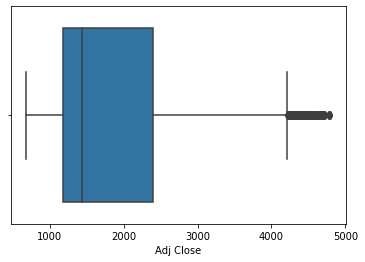

In [58]:
#Hacemos una pequeña detección de Outliers en precios de cierre
sns.boxplot(x=data["Adj Close"])

<AxesSubplot:>

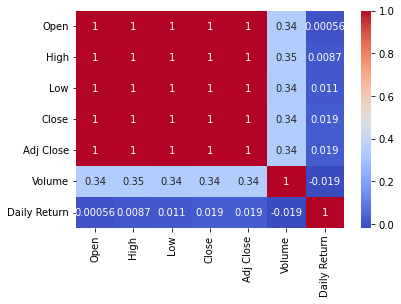

In [59]:
#Matriz de correlación con mapa de calor
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)

**Visualización de los datos del índice S&P 500**

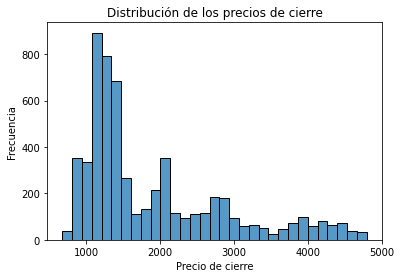

In [60]:
#Distribución de precios de cierre
sns.histplot(data["Close"], kde=False)
plt.title("Distribución de los precios de cierre")
plt.xlabel("Precio de cierre")
plt.ylabel("Frecuencia")
plt.show()

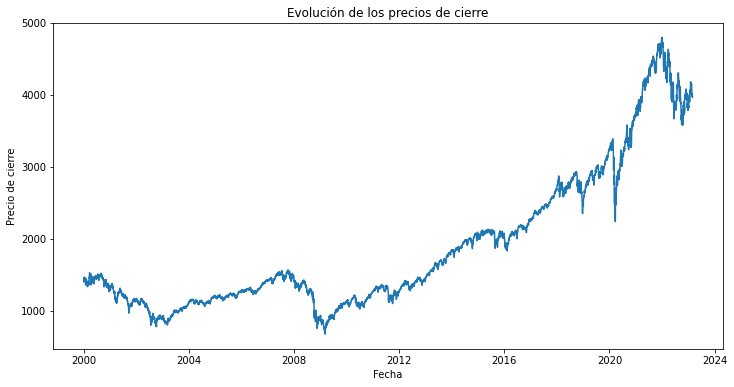

In [61]:
#Evolución de precios de cierre
close_data = data["Close"]

plt.figure(figsize=(12,6))
plt.plot(close_data.index, close_data)
plt.title("Evolución de los precios de cierre")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.show()

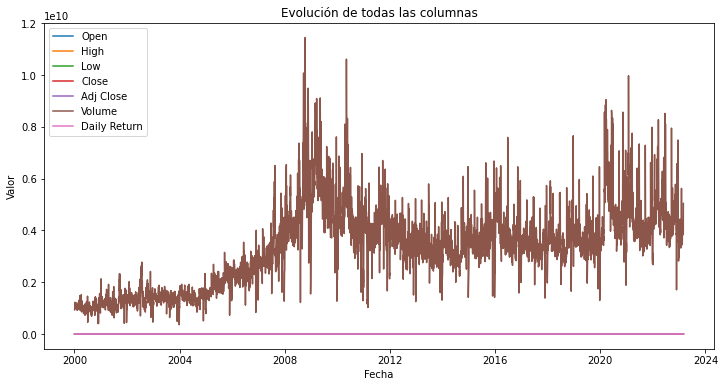

In [62]:
#Evolución general a lo largo del tiempo
ev_data = data.select_dtypes(include=["float64", "int64"])

plt.figure(figsize=(12,6))
for column in ev_data:
    plt.plot(ev_data.index, ev_data[column], label=column)
plt.title("Evolución de todas las columnas")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.show()

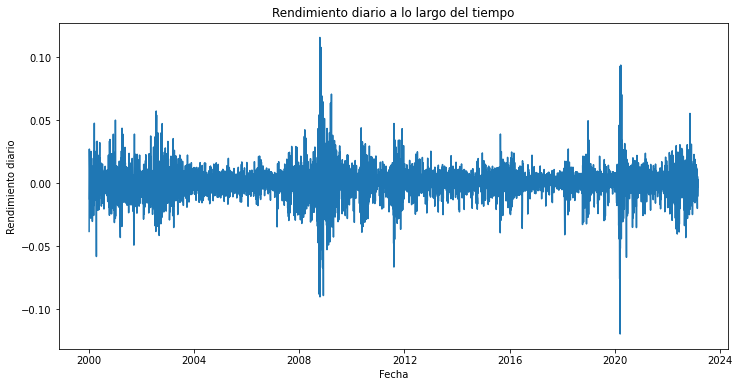

In [63]:
# Calculamos rendimiento diario
daily_returns = data["Close"].pct_change()

# Visualizamos rendimiento diario
plt.figure(figsize=(12,6))
plt.plot(daily_returns.index, daily_returns)
plt.title("Rendimiento diario a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Rendimiento diario")
plt.show()

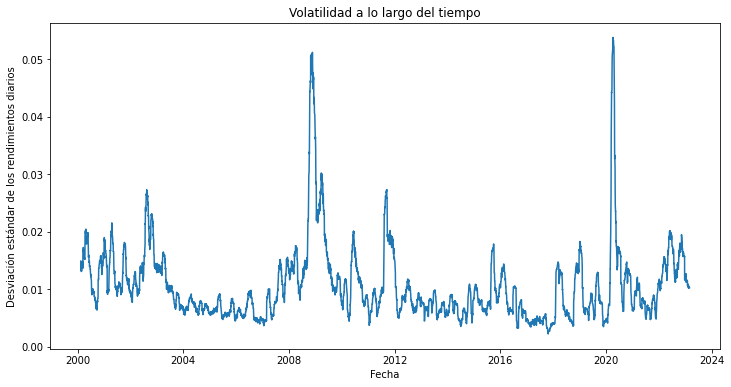

In [64]:
#Análisis de la volatilidad a lo largo del tiempo en precios de cierre

# Calcular los rendimientos diarios
daily_performance = data["Close"].pct_change()

rolling_volatility = daily_performance.rolling(window=30).std()
plt.figure(figsize=(12, 6))
plt.plot(rolling_volatility.index, rolling_volatility)
plt.title("Volatilidad a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Desviación estándar de los rendimientos diarios")
plt.show()

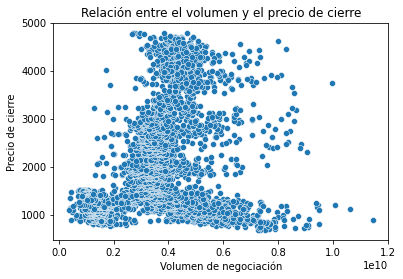

In [65]:
#Grafico de disperción entre el volumen y el precio de cierre
sns.scatterplot(x="Volume", y="Close", data=data)
plt.title("Relación entre el volumen y el precio de cierre")
plt.xlabel("Volumen de negociación")
plt.ylabel("Precio de cierre")
plt.show()

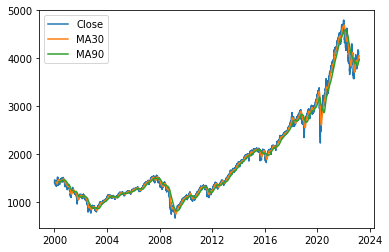

In [66]:
#Calculamos el promedio movil de 30 y 90 días

#Calculamos el promedio móvil de 30 días
data["MA30"] = data["Close"].rolling(window=30).mean()

#Calculamos el promedio móvil de 90 días
data["MA90"] = data["Close"].rolling(window=90).mean()

#Visualizamos los resultados
plt.plot(data["Close"])
plt.plot(data["MA30"])
plt.plot(data["MA90"])
plt.legend(["Close", "MA30", "MA90"])
plt.show()

Los exportamos en un CSV

In [67]:
data.to_csv("index_sp.csv", index=False)

#**Descarga de datos del rubro tecnología**

In [68]:
#XLK 
trs = ["XLK"]
tech = yf.download(trs, start="2000-01-01")

[*********************100%***********************]  1 of 1 completed


In [69]:
# Calcular los retorno diarios
tech["Daily Return"] = tech["Close"].pct_change()

In [70]:
#Aplicamos la columna Date
tech['Date'] = tech.index.date

**Exploramos los datos Tech**

In [71]:
tech.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Date
Date,,,,,,,,
2000-01-03,55.625,55.62500,53.5000,55.43750,42.209305,938100,NaN,2000-01-03
2000-01-04,54.000,54.75000,52.3125,52.62500,40.067909,545500,-0.050733,2000-01-04
2000-01-05,51.750,53.06250,50.1250,51.84375,39.473072,1906000,-0.014846,2000-01-05
2000-01-06,51.250,52.09375,49.6250,50.12500,38.164444,1670000,-0.033153,2000-01-06
2000-01-07,49.625,51.00000,49.1250,51.00000,38.830658,686000,0.017456,2000-01-07


**Realizamos una pequeña visualización**

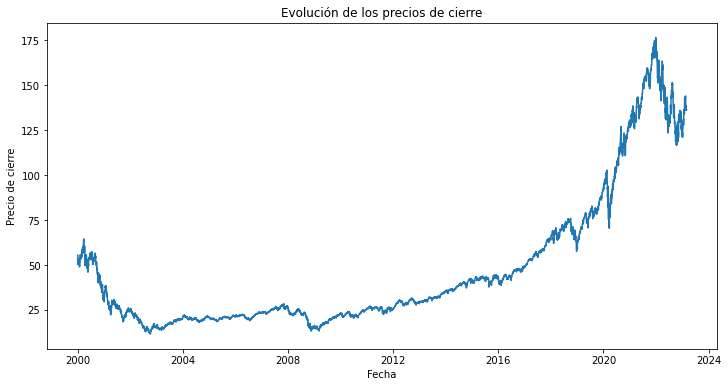

In [72]:
#Evolución de precios de cierre
close_tech = tech["Close"]

plt.figure(figsize=(12,6))
plt.plot(close_tech.index, close_tech)
plt.title("Evolución de los precios de cierre")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.show()

In [73]:
tech.to_csv("tech.csv", index=False)